### Hyperparameters

In [11]:
from keras.callbacks import EarlyStopping

# Stopping training when validation loss does not improve
callbacks = [EarlyStopping(monitor="val_accuracy", patience=3),
             EarlyStopping(monitor="val_loss", patience=3)]

EPOCHS = 20
BATCH_SIZE = 32

### Loading data

In [12]:
from data.norec.dataloader import load_full_dataset
from data.dataloader import load_data

# Load binary data
binary_dataset = load_full_dataset(binary=True)
binary_data = load_data(binary_dataset)

# Load multiclass data
multiclass_dataset = load_full_dataset()
multiclass_data = load_data(multiclass_dataset)

Cleaning text...
Fitting tokenizer...
Converting texts to sequences...
Padding sequences...
One-hot encoding labels...
Done!
Cleaning text...
Fitting tokenizer...
Converting texts to sequences...
Padding sequences...
One-hot encoding labels...
Done!


# Classifying with multiclass dataset

In [13]:
X_train = multiclass_data['X_train']
X_val = multiclass_data['X_val']
X_test = multiclass_data['X_test']
y_train = multiclass_data['y_train']
y_val = multiclass_data['y_val']
y_test = multiclass_data['y_test']
num_words = multiclass_data['num_words']
maxlen = multiclass_data['maxlen']
num_classes = multiclass_data['num_classes']
multiclass_tokenizer = multiclass_data['tokenizer']

print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)
print('y_test shape:', y_test.shape)
print('num_words:', num_words)
print('maxlen:', maxlen)
print('num_classes:', num_classes)

X_train shape: (34903, 214)
X_val shape: (4360, 214)
X_test shape: (4351, 214)
y_train shape: (34903, 3)
y_val shape: (4360, 3)
y_test shape: (4351, 3)
num_words: 20000
maxlen: 214
num_classes: 3


In [14]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

model = Sequential()
model.add(Embedding(num_words, 100, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 214, 100)          2000000   
                                                                 
 lstm_1 (LSTM)               (None, 32)                17024     
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2,017,123
Trainable params: 2,017,123
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(X_val, y_val), verbose=1, callbacks=callbacks)

Epoch 1/20
1091/1091 [==============================] - 118s 106ms/step - loss: 0.6050 - accuracy: 0.7647 - val_loss: 0.4881 - val_accuracy: 0.7959
Epoch 2/20
1091/1091 [==============================] - 132s 121ms/step - loss: 0.4093 - accuracy: 0.8387 - val_loss: 0.5109 - val_accuracy: 0.8016
Epoch 3/20
1091/1091 [==============================] - 131s 120ms/step - loss: 0.2653 - accuracy: 0.9031 - val_loss: 0.6028 - val_accuracy: 0.7661
Epoch 4/20
1091/1091 [==============================] - 118s 108ms/step - loss: 0.1694 - accuracy: 0.9393 - val_loss: 0.6972 - val_accuracy: 0.7773


In [16]:
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=1)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

136/136 [==============================] - 3s 24ms/step - loss: 0.6698 - accuracy: 0.7789
Validation loss: 0.6697559952735901
Validation accuracy: 0.7789013981819153


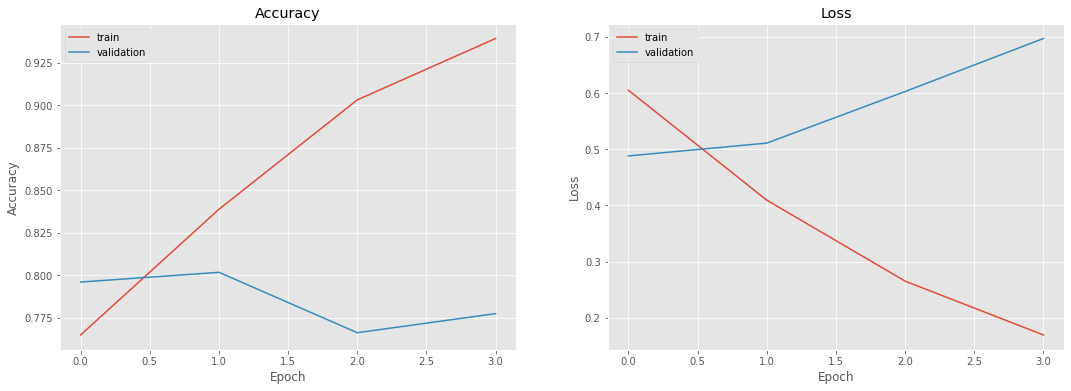

In [17]:
from utils.visualization import plot_history

plot_history(history, save=False, show=True)

# Classifying with binary dataset

In [18]:
X_train = binary_data['X_train']
X_val = binary_data['X_val']
X_test = binary_data['X_test']
y_train = binary_data['y_train']
y_val = binary_data['y_val']
y_test = binary_data['y_test']
num_words = binary_data['num_words']
maxlen = binary_data['maxlen']
num_classes = binary_data['num_classes']
binary_tokenizer = binary_data['tokenizer']

print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)
print('y_test shape:', y_test.shape)
print('num_words:', num_words)
print('maxlen:', maxlen)
print('num_classes:', num_classes)

X_train shape: (34903, 214)
X_val shape: (4360, 214)
X_test shape: (4351, 214)
y_train shape: (34903, 2)
y_val shape: (4360, 2)
y_test shape: (4351, 2)
num_words: 20000
maxlen: 214
num_classes: 2


In [19]:
model = Sequential()
model.add(Embedding(num_words, 100, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 214, 100)          2000000   
                                                                 
 lstm_2 (LSTM)               (None, 32)                17024     
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2,017,090
Trainable params: 2,017,090
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(X_val, y_val), verbose=1, callbacks=callbacks)

Epoch 1/20
1091/1091 [==============================] - 113s 102ms/step - loss: 0.4308 - accuracy: 0.8052 - val_loss: 0.3795 - val_accuracy: 0.8491
Epoch 2/20
1091/1091 [==============================] - 111s 102ms/step - loss: 0.2771 - accuracy: 0.8883 - val_loss: 0.3889 - val_accuracy: 0.8314
Epoch 3/20
1091/1091 [==============================] - 119s 109ms/step - loss: 0.1805 - accuracy: 0.9302 - val_loss: 0.5376 - val_accuracy: 0.8399
Epoch 4/20
1091/1091 [==============================] - 133s 122ms/step - loss: 0.1143 - accuracy: 0.9586 - val_loss: 0.5556 - val_accuracy: 0.8218


In [21]:
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=1)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

136/136 [==============================] - 4s 31ms/step - loss: 0.5087 - accuracy: 0.8272
Validation loss: 0.5086952447891235
Validation accuracy: 0.8271661400794983


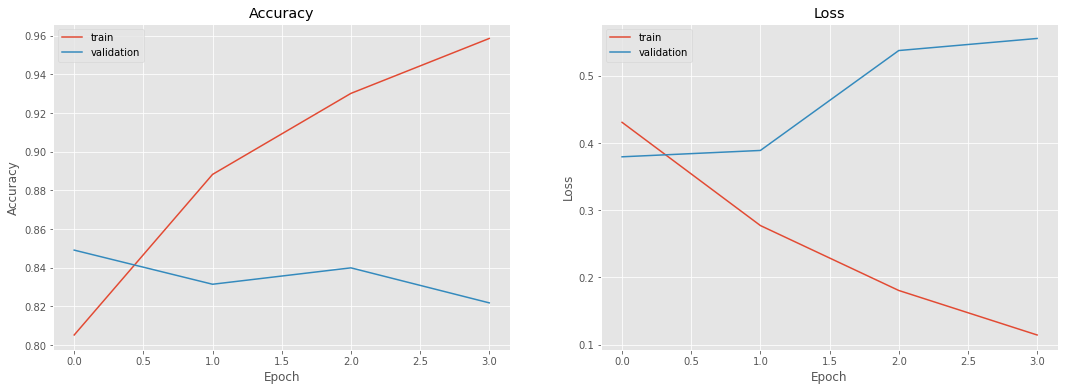

In [22]:
plot_history(history, save=False, show=True)